<a href="https://colab.research.google.com/github/hphp777/Detection/blob/main/Yolo/Ultralytics_yolov3_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ultralytics Yolo v3 설치

In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9862, done.
remote: Total 9862 (delta 0), reused 0 (delta 0), pack-reused 9862
Receiving objects: 100% (9862/9862), 9.19 MiB | 9.54 MiB/s, done.
Resolving deltas: 100% (6667/6667), done.
     |████████████████████████████████| 636 kB 5.3 MB/s 


In [2]:
!cat yolov3/requirements.txt

# pip install -r requirements.txt

# base ----------------------------------------
matplotlib>=3.2.2
numpy>=1.18.5
opencv-python>=4.1.2
Pillow
PyYAML>=5.3.1
scipy>=1.4.1
torch>=1.7.0
torchvision>=0.8.1
tqdm>=4.41.0

# logging -------------------------------------
tensorboard>=2.4.1
# wandb

# plotting ------------------------------------
seaborn>=0.11.0
pandas

# export --------------------------------------
# coremltools>=4.1
# onnx>=1.9.0
# scikit-learn==0.19.2  # for coreml quantization

# extras --------------------------------------
# Cython  # for pycocotools https://github.com/cocodataset/cocoapi/issues/172
pycocotools>=2.0  # COCO mAP
thop  # FLOPS computation


In [3]:
from IPython.display import Image, clear_output  # to display images
import torch

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla K80)


In [4]:
!nvidia-smi

Sat Aug 21 07:07:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    33W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!cd yolov3/data/images;ls -lia

total 656
268 drwxr-xr-x 2 root root   4096 Aug 21 07:05 .
248 drwxr-xr-x 4 root root   4096 Aug 21 07:05 ..
270 -rw-r--r-- 1 root root 487438 Aug 21 07:05 bus.jpg
272 -rw-r--r-- 1 root root 168949 Aug 21 07:05 zidane.jpg


### 이미지 Detection
* https://github.com/ultralytics/yolov3/blob/master/tutorial.ipynb
* detect.py를 python으로 직접 호출하여 수행 가능 
* python detect.py --source 0 # webcam
                            file.jpg #image
                            file.mp4 #video
                            path/ #directory path 밑에 있는 jpg 를 모두 변환
                            path/*.jpg #path 디렉토리 밑에 있는 jpg를 모두 변환
                            'https://youtu.be/NUsoVlDfqZq # Youtube video. CV UI가 필요함. Jupyter notebook 지원 안됨. 

In [6]:
## --project를 설정하지 않으면 자동으로 runs/detect/exp로 detect된 결과가 저장됨.(2번째 수행하면 exp2 디렉토리가 생성됨. 
## coco로 pretrained된 yolov3.pt weight가 없으면 자동으로 download함. 
# 기본 폴더는 yolov3. 상대 경로는 yolov3밑에서부터만 써주면 됨
# 학습된 weight는 yolov3.pt에 들어있음
# 640은 이미지 사이즈
# 0.25는 confidence threshold
# 결과는 자동으로 runs/detect 밑에 저장됨
# detect.py를 실행
# image는 data/source에 들어있음
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

100% 118M/118M [00:01<00:00, 99.7MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.168s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (0.112s)
Results saved to runs/detect/exp
Done. (0.573s)


In [7]:
# 결과가 runs/detect/exp에 저장됨
!ls -lia ./yolov3/runs/detect/exp

total 748
398 drwxr-xr-x 2 root root   4096 Aug 21 07:09 .
397 drwxr-xr-x 3 root root   4096 Aug 21 07:09 ..
405 -rw-r--r-- 1 root root 496317 Aug 21 07:09 bus.jpg
406 -rw-r--r-- 1 root root 255505 Aug 21 07:09 zidane.jpg


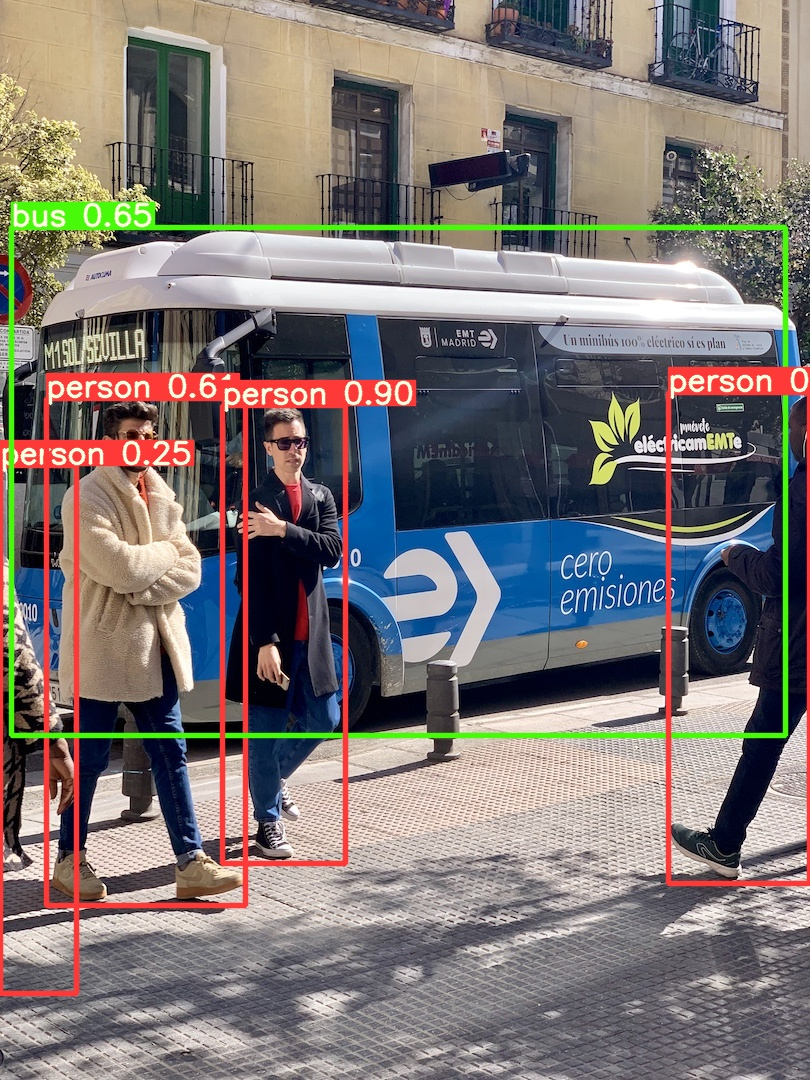

In [10]:
from IPython.display import Image, clear_output 

Image(filename='yolov3/runs/detect/exp/bus.jpg', width=600)

### 다른 image로 Detect 수행

In [11]:
!mkdir /content/data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-08-21 07:16:35--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2021-08-21 07:16:35 (11.0 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



In [12]:
# 실행 디렉토리를 고정하고, 시각화시 bounding box line 두께를 조절. 
# project는 결과가 저장되는 디렉토리에 관한 내용. 절대경로
# name은 저장될 파일의 이름
# exist는 이미 해당 폴더가 존재하면 1,2,3...이런식으로 만들지 말고 이미 있는 폴더에 추가해서 저장하자는 뜻
# line-thickness는 디텍트하는 박스 선의 굵기
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/beatles01.jpg  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=1, max_det=1000, name='run_image', nosave=False, project='/content/data', save_conf=False, save_crop=False, save_txt=False, source='/content/data/beatles01.jpg', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/data/beatles01.jpg: 512x640 5 persons, 10 cars, 1 tie, Done. (0.131s)
Results saved to /content/data/run_image
Done. (0.163s)


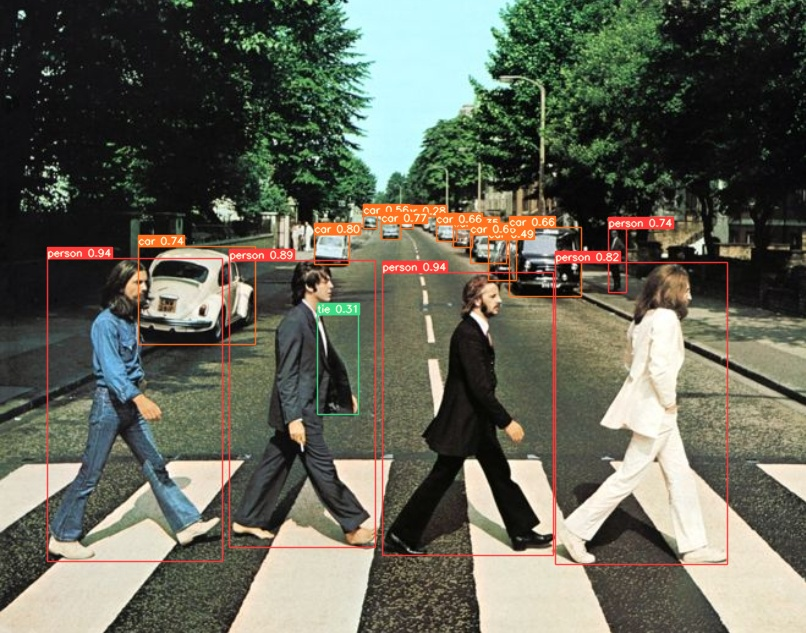

In [13]:
Image(filename='/content/data/run_image/beatles01.jpg', width=600)

### Video Detection
* detect.py의 source가 mp4이면 자동으로 Video Detection 수행. 

In [14]:
# 영상 다운로드 하기
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2021-08-21 07:22:43--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2021-08-21 07:22:44--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2021-08-21 07:22:44--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.

In [15]:
# --project를 /content/data/run_video 로 설정하여 Detect된 영상을 저장.  
# 동영상의 경우에도 위의 경우와 마찬가지로 해 주면 됨.
# 결과를 보면 권총이 coco dataset에 없어서 잘 디텍트 하지 못함.
# 이 외에도 오토바이에서 물컵을 detect하는 등 생뚱맞은 결과가 나오기도 하는데 이는 문맥을 잘 고려하지 못하고 detect했기 때문
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/Night_Day_Chase.mp4 \
                            --project=/content/data/run_video --exist-ok --line-thickness 1

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=1, max_det=1000, name='exp', nosave=False, project='/content/data/run_video', save_conf=False, save_crop=False, save_txt=False, source='/content/data/Night_Day_Chase.mp4', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
video 1/1 (1/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (0.082s)
video 1/1 (2/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 1 bench, Done. (0.079s)
video 1/1 (3/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 1 bench, Done. (0.074s)
video 1/1 (4/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 1 bench, Done. (0.072s)
vid

In [ ]:
# Youtube의 경우는 UI 문제로 변환되지 않음. UI가 지원되는 OS에서 적용 필요. 개인 리눅스
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source https://youtu.be/zbvx7pqw5Gg